Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                          playoffs      game     patch  gamelength    result  \
playoffs                  1.000000  0.424145  0.076764    0.038526 -0.000223   
game                      0.424145  1.000000  0.087134    0.018705 -0.000210   
patch                     0.076764  0.087134  1.000000   -0.013959 -0.000617   
gamelength                0.038526  0.018705 -0.013959    1.000000  0.000131   
result                   -0.000223 -0.000210 -0.000617    0.000131  1.000000   
kills                     0.043694  0.031498  0.033309    0.186164  0.701501   
deaths                    0.044263  0.031985  0.035130    0.187222 -0.700255   
assists                   0.062399  0.032192  0.057739    0.234210  0.696871   
doublekills               0.032738  0.027106  0.021112    0.074679  0.599356   
triplekills               0.029966  0.017065  0.009146    0.031732  0.3

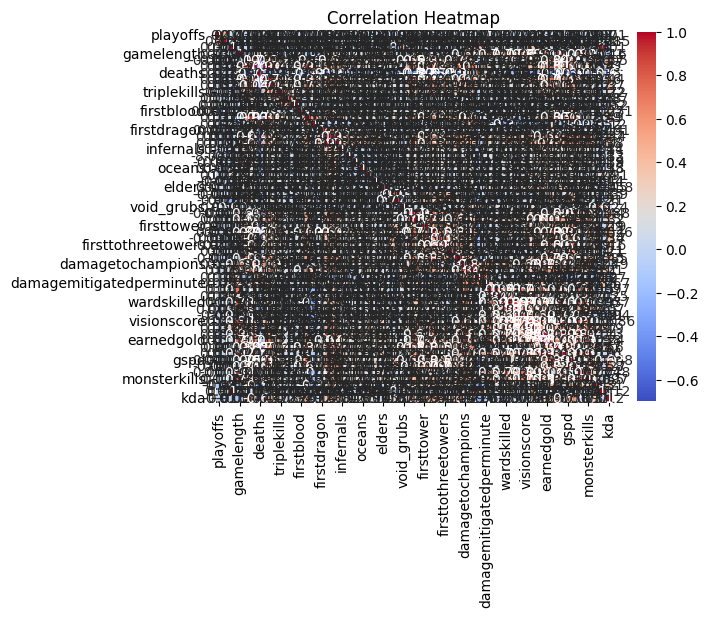

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1843
           1       0.98      1.00      0.99      1829

    accuracy                           0.99      3672
   macro avg       0.99      0.99      0.99      3672
weighted avg       0.99      0.99      0.99      3672



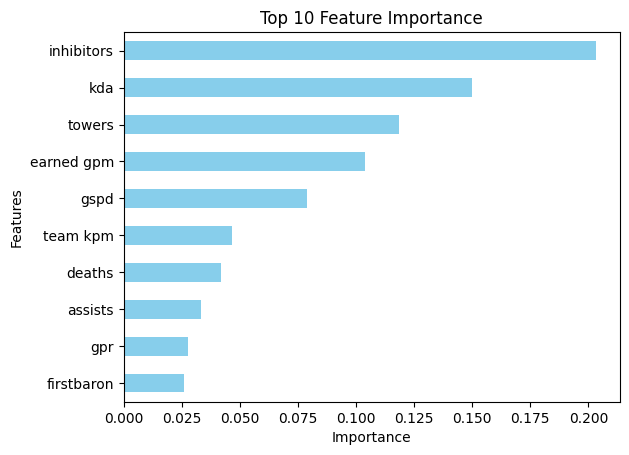

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from google.colab import drive
drive.mount('/content/drive')

DATA_PATH = "/content/drive/MyDrive/datathon/data/"
df = pd.read_csv(f"{DATA_PATH}team.csv")

df = df[df['year'] == 2024]

string_columns = df.select_dtypes(include=['object']).columns
if not string_columns.empty:
    df = df.drop(columns=string_columns)

keywords = ['opp', '10', '15']
columns_to_drop = [col for col in df.columns if any(keyword in col for keyword in keywords)]
if columns_to_drop:
    df = df.drop(columns=columns_to_drop)


# 2. 상관관계 분석
correlation = df.corr()  # 전체 상관행렬 계산
result_correlation = correlation['result'].sort_values(ascending=False)  # result와의 상관관계만 정렬
print(correlation)

# 히트맵 시각화
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


X = df.drop(columns=['result'])  # result 제외
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

fig, ax = plt.subplots()
top_features.sort_values(ascending=True).plot(kind='barh', color='skyblue', ax=ax)  # 수평 바 차트
plt.title("Top 10 Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
#st.pyplot(fig)

# 예측 정확도 및 결과 확인
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                          playoffs      game     patch  gamelength    result  \
playoffs                  1.000000  0.357899  0.128310    0.039848 -0.000371   
game                      0.357899  1.000000  0.146200    0.032931 -0.000130   
patch                     0.128310  0.146200  1.000000   -0.033519  0.000019   
gamelength                0.039848  0.032931 -0.033519    1.000000 -0.000369   
result                   -0.000371 -0.000130  0.000019   -0.000369  1.000000   
kills                     0.034313  0.029375  0.000865    0.111310  0.363883   
deaths                    0.048958  0.040838  0.000441    0.155703 -0.507538   
assists                   0.058320  0.037923 -0.007488    0.211735  0.552152   
doublekills               0.022773  0.019756 -0.000222    0.043036  0.266334   
triplekills               0.012093  0.001835 -0.002467    0.008147  0.164212   
quadrakills               0.010650  0.001574 -0.016824    0.013840  0.077365   
pentakills                0.007677  0.00

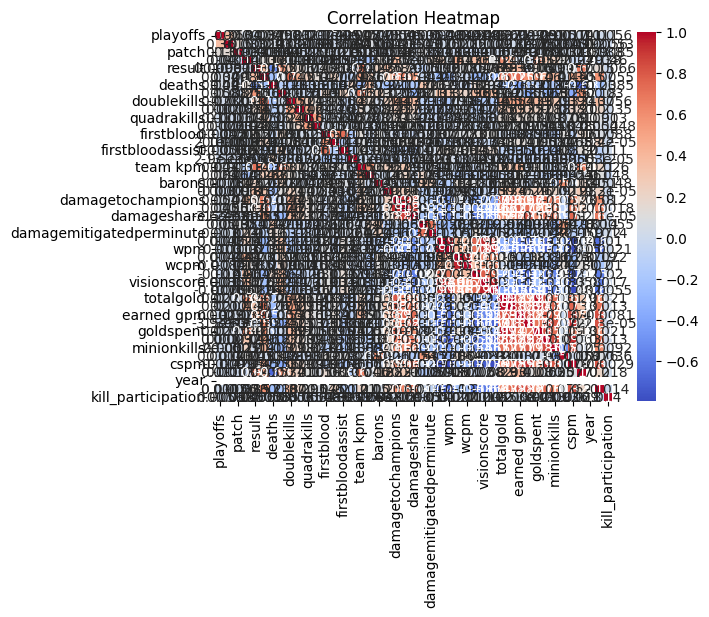

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29955
           1       1.00      1.00      1.00     29496

    accuracy                           1.00     59451
   macro avg       1.00      1.00      1.00     59451
weighted avg       1.00      1.00      1.00     59451



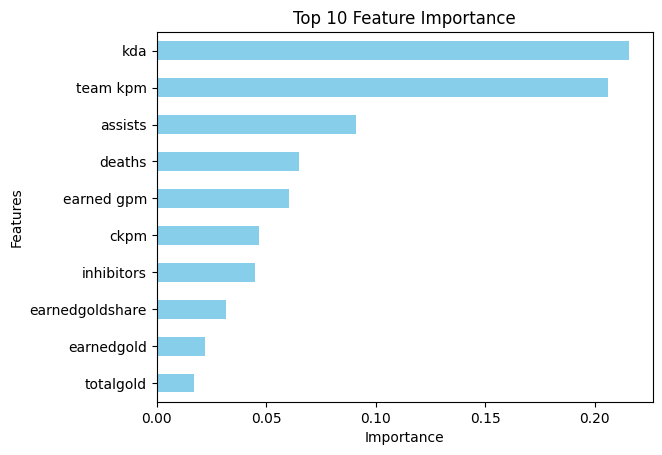

In [7]:
DATA_PATH = "/content/drive/MyDrive/datathon/data/"
df = pd.read_csv(f"{DATA_PATH}player.csv")

df = df[df['year'] == 2024]

string_columns = df.select_dtypes(include=['object']).columns
if not string_columns.empty:
    df = df.drop(columns=string_columns)

keywords = ['opp', '10', '15']
columns_to_drop = [col for col in df.columns if any(keyword in col for keyword in keywords)]
if columns_to_drop:
    df = df.drop(columns=columns_to_drop)


# 2. 상관관계 분석
correlation = df.corr()  # 전체 상관행렬 계산
result_correlation = correlation['result'].sort_values(ascending=False)  # result와의 상관관계만 정렬
print(correlation)

# 히트맵 시각화
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


X = df.drop(columns=['result'])  # result 제외
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

fig, ax = plt.subplots()
top_features.sort_values(ascending=True).plot(kind='barh', color='skyblue', ax=ax)  # 수평 바 차트
plt.title("Top 10 Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
#st.pyplot(fig)

# 예측 정확도 및 결과 확인
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))